In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [5]:
import os
os.getcwd()
os.chdir('F:\\DSP\\Python')

In [7]:
dataset = pd.read_csv('AirPassengers.csv')
dataset.head()

,TravelDate,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


In [8]:
dataset['TravelDate']=pd.to_datetime(dataset['TravelDate'],infer_datetime_format=True)
indexeddataset=dataset.set_index(['TravelDate'])
indexeddataset.head()

,Passengers
TravelDate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


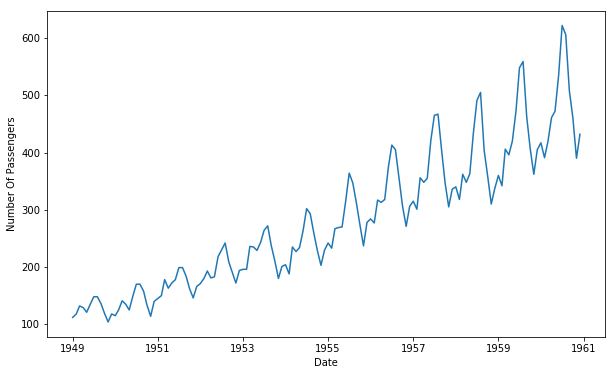

In [9]:
plt.xlabel('Date')
plt.ylabel('Number Of Passengers')
plt.plot(indexeddataset)

# Check if data is stationary by performing rolling statistics and Duckey fuller test

# Determine rolling statistics

In [10]:
rolmean=indexeddataset.rolling(window=12).mean()
rolstd=indexeddataset.rolling(window=12).std()
print(rolmean,rolstd)

            Passengers
TravelDate            
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01  126.666667
1950-01-01  126.916667
1950-02-01  127.583333
1950-03-01  128.333333
1950-04-01  128.833333
1950-05-01  129.166667
1950-06-01  130.333333
1950-07-01  132.166667
1950-08-01  134.000000
1950-09-01  135.833333
1950-10-01  137.000000
1950-11-01  137.833333
1950-12-01  139.666667
1951-01-01  142.166667
1951-02-01  144.166667
1951-03-01  147.250000
1951-04-01  149.583333
1951-05-01  153.500000
1951-06-01  155.916667
...                ...
1958-07-01  376.333333
1958-08-01  379.500000
1958-09-01  379.500000
1958-10-01  380.500000
1958-11-01  380.916667
1958-12-01  381.000000
1959-01-01  382.666667
1959-02-01  384.666667
1959-03-01  388.333333
1959-04-01  392.333333
1959-05-01 

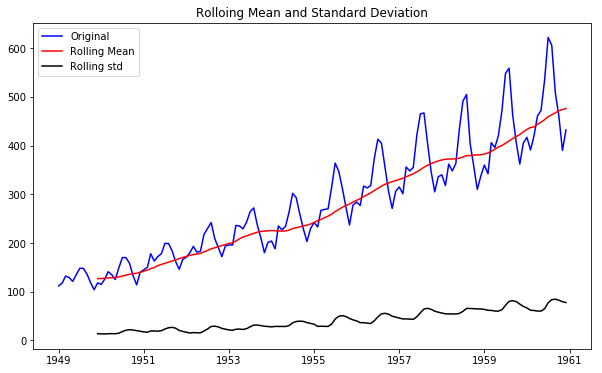

In [11]:
orig=plt.plot(indexeddataset,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolloing Mean and Standard Deviation')
plt.show(block=False)

# Perform Dickey Fuller test

In [13]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-fuller test:')
dftest = adfuller(indexeddataset['Passengers'], autolag='AIC')
dftest


Results of Dickey-fuller test:


(0.81536887920605039,
 0.99188024343764103,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.5787700591715979,
  '5%': -2.8840418343195267},
 996.69293083901903)

In [14]:
dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-value','#Lags used','Number of observations used'])
dfoutput

Test Statistics                  0.815369
p-value                          0.991880
#Lags used                      13.000000
Number of observations used    130.000000
dtype: float64

In [16]:
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)

Test Statistics                  0.815369
p-value                          0.991880
#Lags used                      13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


# Estimating Trend

# Take log of dataset to see if the data become stationary

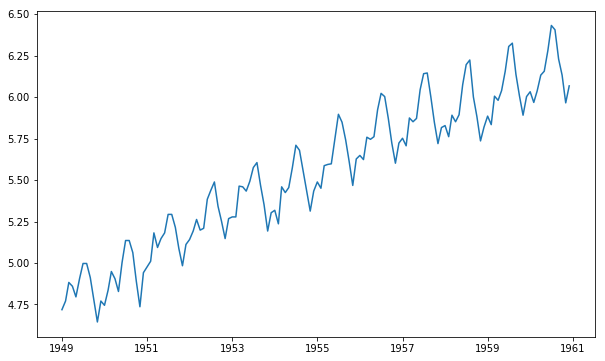

In [18]:
indexeddataset_log_scale = np.log(indexeddataset)
plt.plot(indexeddataset_log_scale)

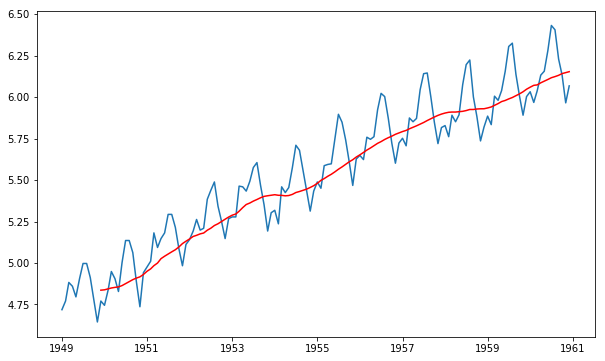

In [19]:
movingaverage = indexeddataset_log_scale.rolling(window=12).mean()
movingSTD = indexeddataset_log_scale.rolling(window=12).std()
plt.plot(indexeddataset_log_scale)
plt.plot(movingaverage,color='red')

# Perform below step to make data stationary

In [20]:
indexeddataset_log_scale_minus_movingaverage = indexeddataset_log_scale - movingaverage
indexeddataset_log_scale_minus_movingaverage.head()

,Passengers
TravelDate,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


In [21]:
indexeddataset_log_scale_minus_movingaverage.dropna(inplace=True)
indexeddataset_log_scale_minus_movingaverage.head()

,Passengers
TravelDate,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


 # Perform rolling average and Dickey filler test again to check if data is stationary

In [24]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    # Detrmine rolling statisticts
    movingaverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    # plot rolling statistcs
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingaverage, color = 'red', label = 'Rolling Mean')
    std = plt.plot(movingSTD, color = 'black',label = 'Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey Fuller test
    print('Results of Dickey-Fuller test:')
    dftest = adfuller(timeseries['Passengers'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index =['Test Statistics','p-value','#Lags used','Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key]=value
    print(dfoutput)

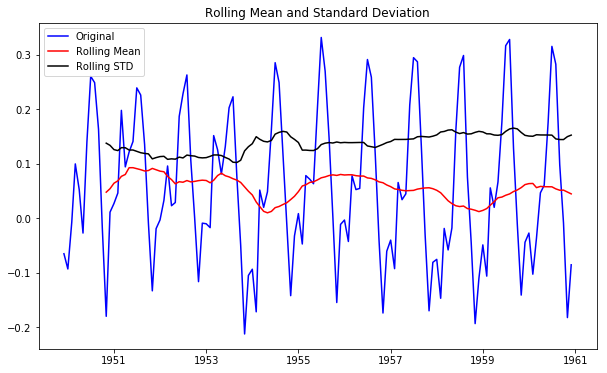

Results of Dickey-Fuller test:
Test Statistics                 -3.162908
p-value                          0.022235
#Lags used                      13.000000
Number of observations used    119.000000
Critical value (1%)             -3.486535
Critical value (5%)             -2.886151
Critical value (10%)            -2.579896
dtype: float64


In [25]:
test_stationarity(indexeddataset_log_scale_minus_movingaverage)

In [26]:
exponentialDecayWeightedAverage = indexeddataset_log_scale.ewm(halflife=12,min_periods=0,adjust=True).mean()
exponentialDecayWeightedAverage.head()

,Passengers
TravelDate,
1949-01-01,4.718499
1949-02-01,4.745345
1949-03-01,4.793835
1949-04-01,4.811785
1949-05-01,4.808206


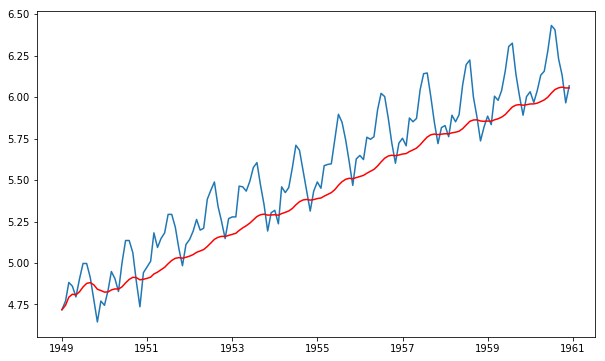

In [27]:
plt.plot(indexeddataset_log_scale)
plt.plot(exponentialDecayWeightedAverage,color = 'red')

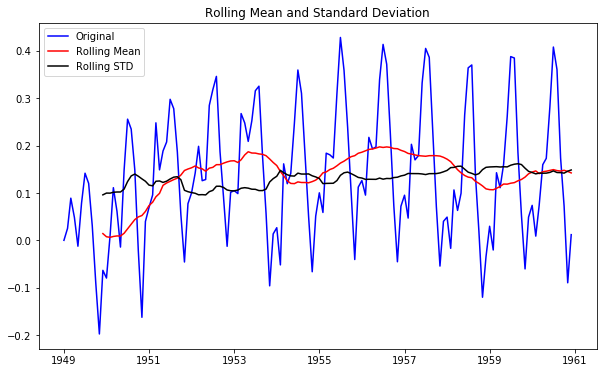

Results of Dickey-Fuller test:
Test Statistics                 -3.601262
p-value                          0.005737
#Lags used                      13.000000
Number of observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


In [28]:
indexeddataset_log_scale_minus_exponentialDecayWeightedAverage = indexeddataset_log_scale - exponentialDecayWeightedAverage
test_stationarity(indexeddataset_log_scale_minus_exponentialDecayWeightedAverage)

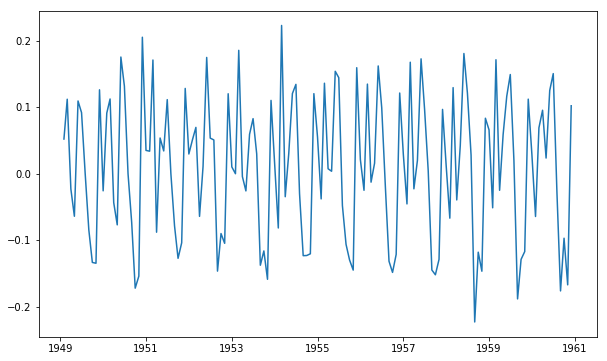

In [29]:
datasetLogDiffShifting = indexeddataset_log_scale - indexeddataset_log_scale.shift()
plt.plot(datasetLogDiffShifting)

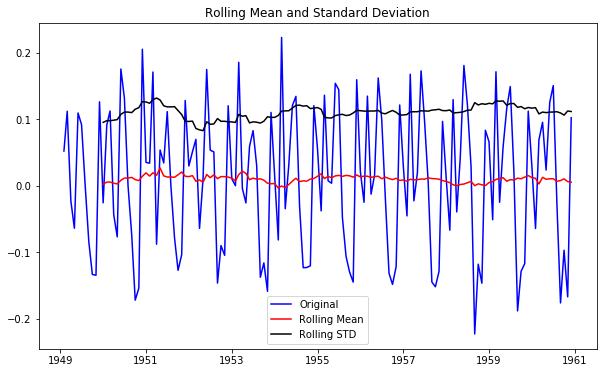

Results of Dickey-Fuller test:
Test Statistics                 -2.717131
p-value                          0.071121
#Lags used                      14.000000
Number of observations used    128.000000
Critical value (1%)             -3.482501
Critical value (5%)             -2.884398
Critical value (10%)            -2.578960
dtype: float64


In [30]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

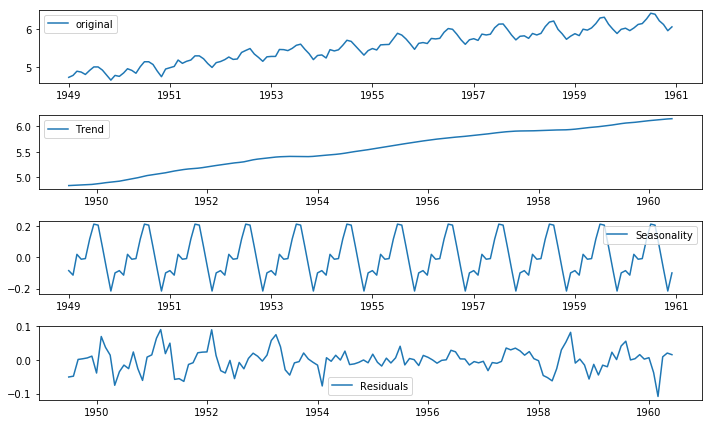

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexeddataset_log_scale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(indexeddataset_log_scale, label = 'original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label = 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label = 'Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label = 'Residuals')
plt.legend(loc='best')
plt.tight_layout()

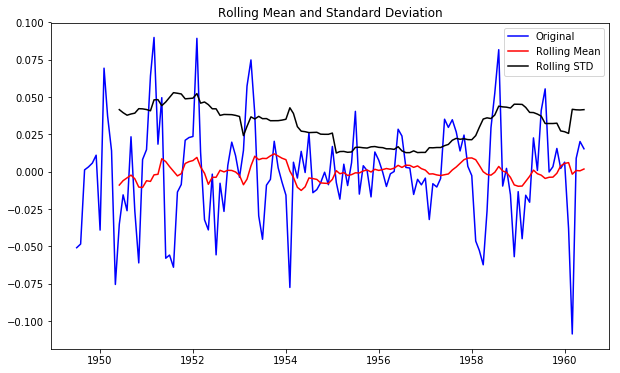

Results of Dickey-Fuller test:
Test Statistics               -6.332387e+00
p-value                        2.885059e-08
#Lags used                     9.000000e+00
Number of observations used    1.220000e+02
Critical value (1%)           -3.485122e+00
Critical value (5%)           -2.885538e+00
Critical value (10%)          -2.579569e+00
dtype: float64


In [35]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)

# Data is stationary so plot ACF(Auto Co-related graph) and PACF(Partial Auto Co-related graph) graphs

# ACF will give values of Q and PACF gives values of P and integration(D)=1 as we have shifted one value

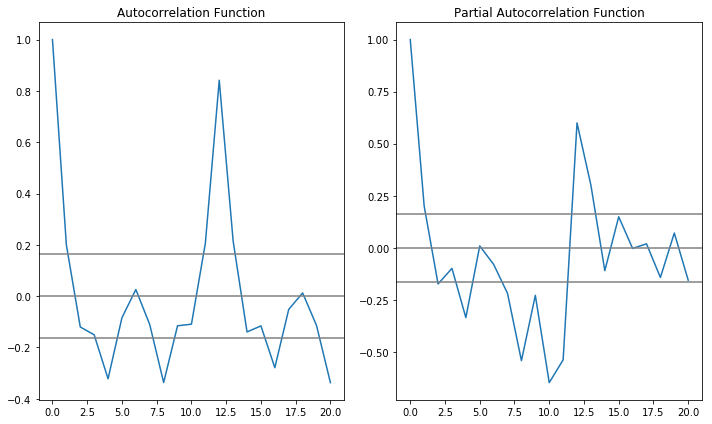

In [40]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method ='ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle= '-',color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='-',color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='-',color = 'gray')
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle= '-',color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='-',color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='-',color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# Calculate P&Q values based on the first point where graph cuts the line

Plotting AR model


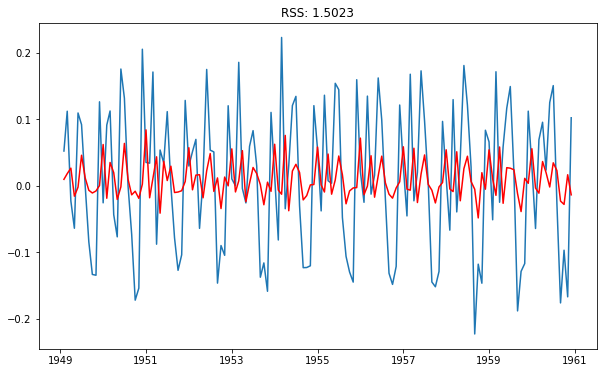

In [44]:
# AR Model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(indexeddataset_log_scale, order = (2,1,0))
results_AR = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color = 'red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['Passengers'])**2))
print('Plotting AR model')

Plotting MA model


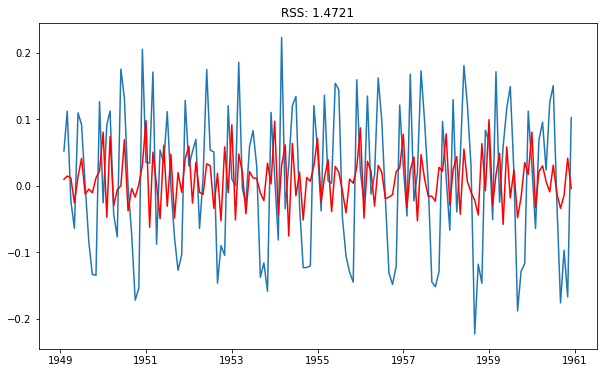

In [43]:
# MA model
model = ARIMA(indexeddataset_log_scale, order = (0,1,2))
results_MA = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues,color = 'red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['Passengers'])**2))
print('Plotting MA model')

Plotting ARIMA model


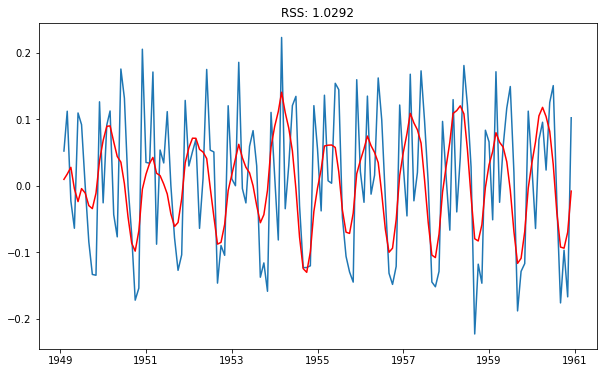

In [45]:
model = ARIMA(indexeddataset_log_scale, order = (2,1,2))
results_ARIMA = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color = 'red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Passengers'])**2))
print('Plotting ARIMA model')

In [46]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy = True)
print(predictions_ARIMA_diff.head())

TravelDate
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [52]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

TravelDate
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [53]:
predictions_ARIMA_log = pd.Series(indexeddataset_log_scale['Passengers'].ix[0],index=indexeddataset_log_scale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

TravelDate
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

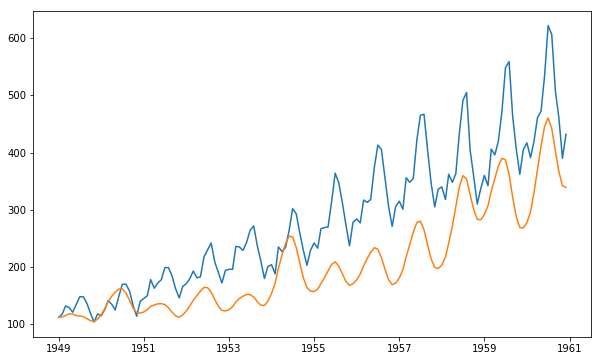

In [54]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexeddataset)
plt.plot(predictions_ARIMA)

In [55]:
indexeddataset_log_scale.head()

,Passengers
TravelDate,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


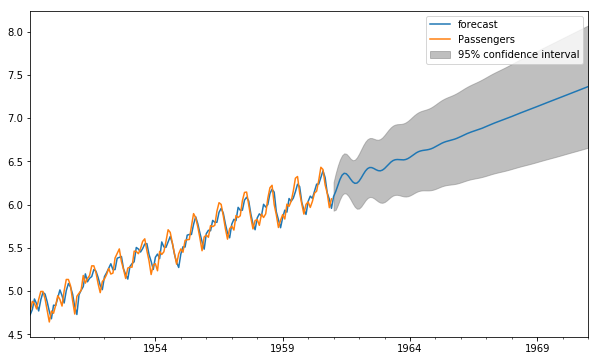

In [56]:
results_ARIMA.plot_predict(1,264)
x=results_ARIMA.forecast(steps=120)